In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

symbol = 'NVDA'
files = sorted(os.listdir(f'data/{symbol}'), key=lambda f: f'{f:>7}')


In [2]:
results = []
leverage = {}
for f in files:
    df = pd.read_csv(f'data/{symbol}/{f}')
    df.start_date = pd.to_datetime(df.start_date)
    df.end_date = pd.to_datetime(df.end_date)
    df['TTL'] = ((df.end_date - df.start_date).dt.days / 7).round(0)
    call_profits = df.call_end_price / df.call_start_price - 1
    mean_call_profit = call_profits.mean()
    annual_call_profit = (call_profits / df.TTL * 52).mean()
    positive_ratio = (call_profits > 0).mean()
    call_leverage = (df.call_strike_price / df.call_start_price).median()
    print(f'[{f:>7}] '
          f'mean profit: {mean_call_profit:+5.0%} '
          f'annual profit: {annual_call_profit:+6.0%} '
          f'positive: {positive_ratio:5.0%} '
          f'leverage: {call_leverage:4.1f} '
        #   f'daily tx: {df.call_daily_tx.median():4.0f} '
          f'transactions: {len(df):3d} ')
    results.append({
        'profit': mean_call_profit,
        'positive': positive_ratio,
    })

    w = int(re.match(r'\d+', f)[0])
    leverage[w] = call_leverage

[ 1w.csv] mean profit:  +42% annual profit: +2176% positive:   44% leverage: 45.0 transactions: 102 
[ 2w.csv] mean profit:  +64% annual profit: +1674% positive:   50% leverage: 28.3 transactions: 101 
[ 3w.csv] mean profit:  +86% annual profit: +1485% positive:   53% leverage: 23.1 transactions: 100 
[ 4w.csv] mean profit: +101% annual profit: +1310% positive:   53% leverage: 19.3 transactions:  99 
[ 5w.csv] mean profit: +124% annual profit: +1286% positive:   53% leverage: 17.1 transactions:  97 
[ 6w.csv] mean profit: +136% annual profit: +1181% positive:   59% leverage: 15.6 transactions:  96 
[ 7w.csv] mean profit: +179% annual profit: +1327% positive:   57% leverage: 14.2 transactions:  56 
[ 8w.csv] mean profit: +159% annual profit: +1034% positive:   64% leverage: 13.4 transactions:  22 
[ 9w.csv] mean profit: +185% annual profit: +1067% positive:   67% leverage: 11.7 transactions:  21 
[10w.csv] mean profit: +202% annual profit: +1053% positive:   57% leverage: 12.1 transacti

In [3]:
leverage

{1: 45.048954161103694,
 2: 28.34645669291339,
 3: 23.078757717985823,
 4: 19.33139534883721,
 5: 17.06700379266751,
 6: 15.620063191153237,
 7: 14.24426477485154,
 8: 13.38747901649057,
 9: 11.738148984198647,
 10: 12.073272273105745,
 11: 11.153846153846153,
 12: 10.614525139664805,
 13: 9.758771929824562,
 14: 9.537422037422036,
 15: 9.183576410906785,
 16: 8.996728462377318,
 17: 8.391608391608392,
 18: 8.289756220790704,
 19: 8.157389635316699,
 20: 7.906976744186046,
 21: 7.758620689655173,
 22: 7.539353769676885,
 23: 7.381756756756756,
 24: 7.292856343074684,
 25: 7.112068965517242,
 26: 6.854838709677419}

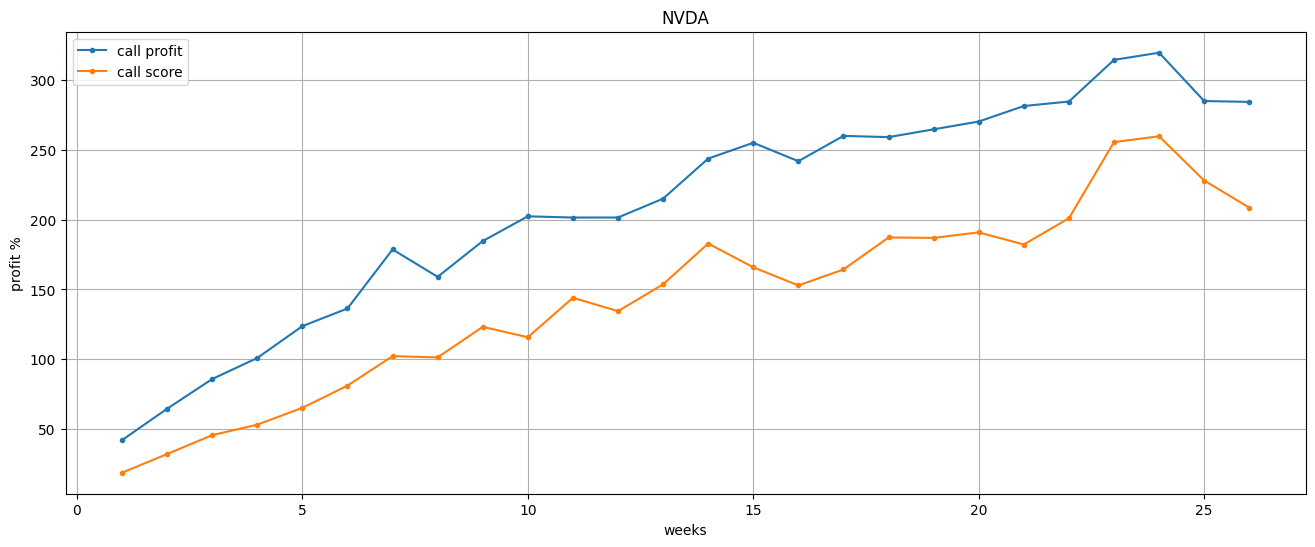

In [4]:
plt.figure(figsize=(16,6))
plt.plot([None]+[r['profit'] * 100 for r in results], label='call profit', marker='.')
plt.plot([None]+[r['profit'] * r['positive'] * 100 for r in results], label='call score', marker='.')
plt.legend(loc='best')
plt.title(symbol)
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()

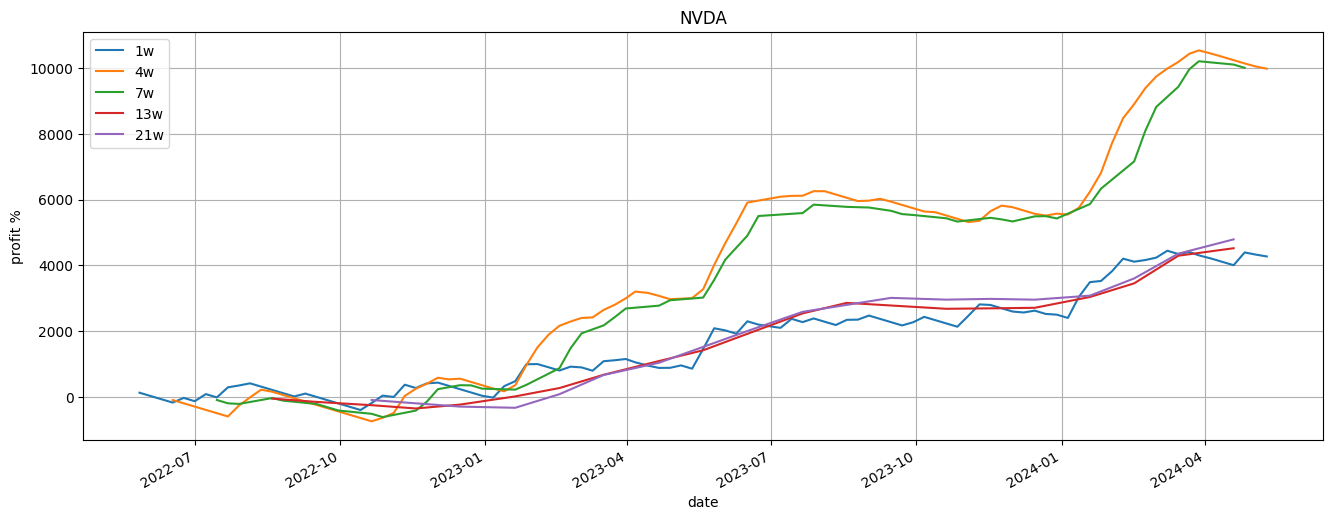

In [5]:
plt.figure(figsize=(16,6))

for n in [1,4,7,13,21]:
    k = f'{n}w'
    df = pd.read_csv(f'data/{symbol}/{k}.csv')
    df.end_date = pd.to_datetime(df.end_date)
    df = df.set_index('end_date')
    df[k] = (df.call_end_price / df.call_start_price - 1) * 100
    df[k].cumsum().plot()

plt.legend(loc='best')
plt.title(symbol)
plt.xlabel('date')
plt.ylabel('profit %')
plt.grid()
plt.show()

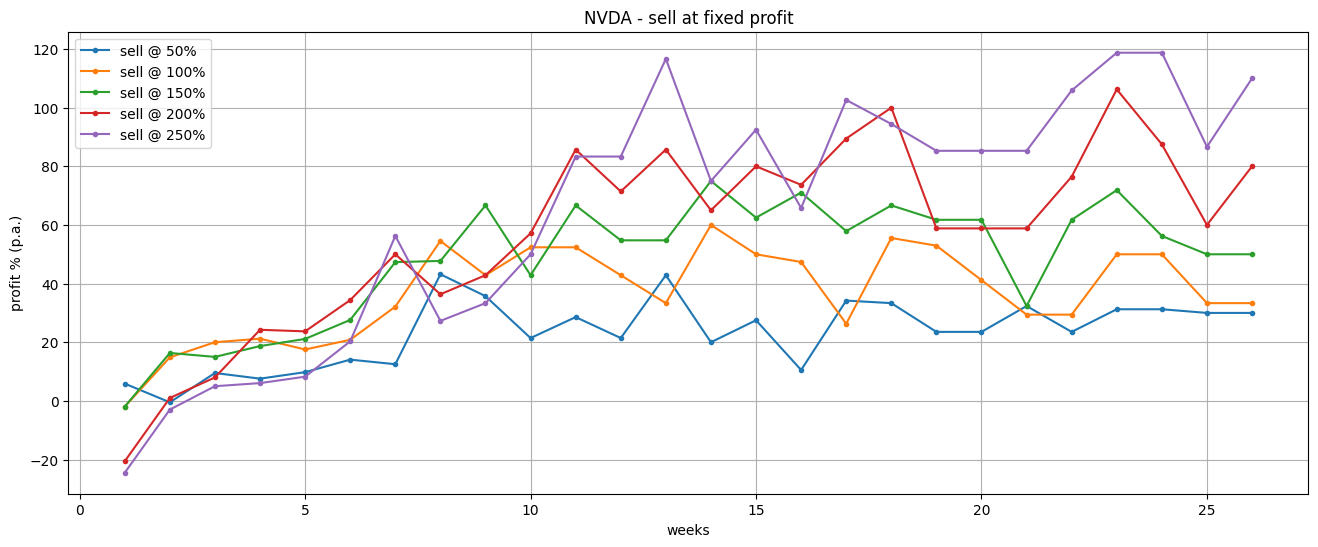

In [6]:
profit_thresholds = [0.5,1,1.5,2,2.5]
results = []
for f in files:
    df = pd.read_csv(f'data/{symbol}/{f}')
    df.start_date = pd.to_datetime(df.start_date)
    df.end_date = pd.to_datetime(df.end_date)
    df['TTL'] = ((df.end_date - df.start_date).dt.days / 7).round(0)
    call_max_profits = df.call_max_price / df.call_start_price - 1
    weeks = df.TTL.median()
    r = {}
    for p in profit_thresholds:
        q = (call_max_profits >= p).mean()
        r[p] = (q * (p + 1) - 1) #* 52 / weeks
    results.append(r)

plt.figure(figsize=(16,6))

for p in profit_thresholds:
    plt.plot([None]+[r[p] * 100 for r in results], label=f'sell @ {p:.0%}', marker='.')

plt.legend(loc='best')
plt.title(symbol + ' - sell at fixed profit')
plt.xlabel('weeks')
plt.ylabel('profit % (p.a.)')
plt.grid()
plt.show()

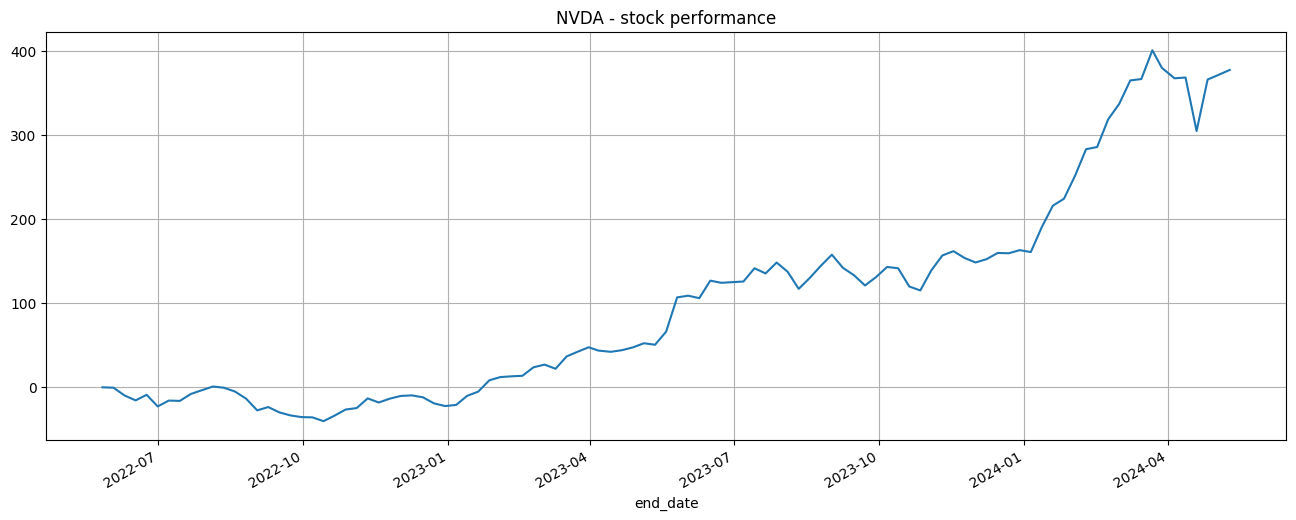

In [7]:
df = pd.read_csv(f'data/{symbol}/1w.csv')
df.end_date = pd.to_datetime(df.end_date)
df = df.set_index('end_date')

plt.figure(figsize=(16,6))
plt.title(symbol + ' - stock performance')
base = df.stock_end_price.iloc[0]
df['pct']=df.stock_end_price / base - 1
(df.pct * 100).plot()
plt.grid()